In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

Рассмотрим следующий пример переобучения модели. 
<br>Построим зависимость $y(x) = \cos(1.5\pi x)$, $y$ — целевая переменная, а $x$ - объект (просто число от 0 до 1). <br>Смоделируем модель, взяв 30 случайных точек $x_i$ в отрезке $[0;1]$ и добавив нормальный шум в значения функции: <br>$\tilde{y}_i = y(x_i) + \mathcal{N}(0, 0.01)$.

Попытаемся обучить три разных линейных модели: признаки для первой — $\{x\}$, для второй — $\{x, x^2, x^3, x^4\}$, для третьей — $\{x, \dots, x^{20}\}$.

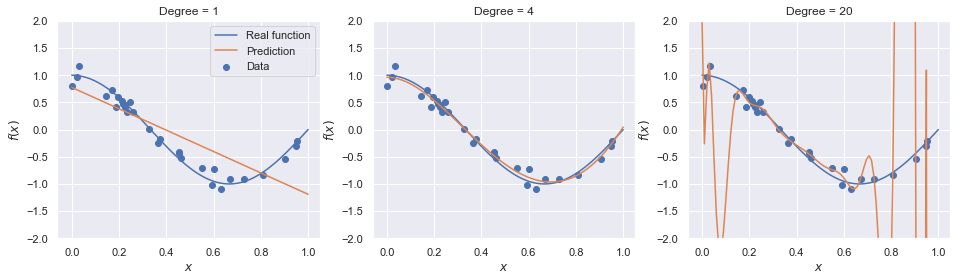

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

fig, axs = plt.subplots(figsize=(16, 4), ncols=3)

for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree).fit_transform(x[:, None])
    
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)
    
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_objects, y_objects, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    
    if i == 0:             # Легенда - это помощник, позволяющий определить,
        axs[i].legend()    # что соответствует определенному цвету линии или прямоугольника.
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

Чтобы избежать переобучения, модель регуляризуют. Обычно переобучения в линейных моделях связаны с большими весами, 
<br>а поэтому модель часто штрафуют за большие значения весов, добавляя к функционалу качества, например, квадрат $\ell^2$-нормы вектора $w$:
$$Q_{reg}(X, y, a) = Q(X, y, a) + \lambda \|w\|_2^2$$
Это слагаемое называют $\ell_2$-регуляризатором, а коэффициент $\lambda$ — коэффициентом регуляризации.

--------
-----------
--------

In [3]:
data = pd.read_csv('House Prices_train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.shape

(1460, 81)

*Как видим, в данных есть пропуски*

*Проверочная выборка (validation sample) — выборка, по которой осуществляется выбор наилучшей модели из множества моделей, <br>построенных по обучающей выборке.*

В данных есть уникальное для каждого объекта поле id. 
<br>Обычно такие поля только мешают и способствуют переобучению. Удалим это поле из данных:

In [6]:
data = data.drop(columns=["Id"])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Разделим данные на обучающую и тестовую выборки. Для простоты не будем выделять дополнительно валидационную выборку.
<br>Дополнительно нам придется отделить значения целевой переменной от данных:

In [7]:
from sklearn.model_selection import train_test_split

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

*Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. 
<br>Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины 
<br>будут иметь одни и те же значения при каждом вызове.*

*Если мы хотим сравнить несколько методов или разные наборы параметров, 
<br>то для честного сравнения надо использовать одинаковые обучающие и проверочные сеты.*

*Для генерации чисел нужно некоторое начальное состояние, seed, из которого будет генерироваться вся остальная последовательность. <br>При одинаковых seed последовательность тоже будет одинаковая.
<br>Но seed нужен для того, чтобы при каждом запуске алгоритм выдавал разные значения (для этого вы должны подавать каждый раз разный seed).*

Посмотрим на значения целевой переменной:

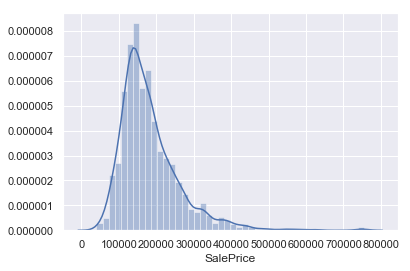

In [8]:
sns.distplot(y_train)

Судя по гистограмме, у нас есть примеры с нетипично большой стоимостью, что может помешать нам, <br>если наша функция потерь слишком чувствительна к выбросам.

Так как для решения нашей задачи хотелось обучить линейную регрессию, было бы хорошо найти признаки, "наиболее линейно" связанные с целевой переменной, иначе говоря, посмотреть на коэффициент корреляции Пирсона между признаками и целевой переменной. <br>Не все признаки являются числовыми, пока что не будем рассматривать их.

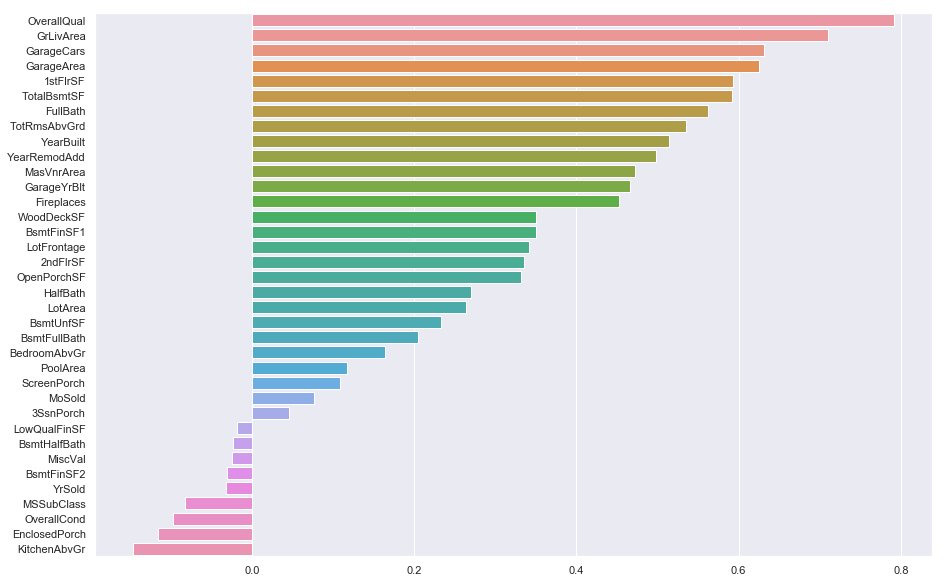

In [9]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_train[feature], y_train)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

Посмотрим на признаки из начала списка. Для этого нарисуем график зависимости целевой переменной от каждого из признаков. <br>На этом графике каждая точка соответствует паре признак-таргет (график называется scatter-plot):

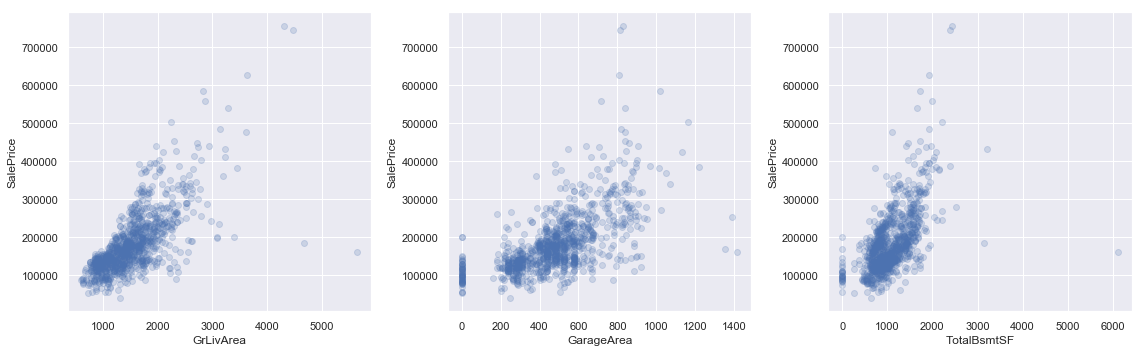

In [10]:
ig, axs = plt.subplots(figsize=(16, 5), ncols=3)

for i, feature in enumerate(["GrLivArea", "GarageArea", "TotalBsmtSF"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
    
plt.tight_layout()

Видим, что между этими признаками и целевой переменной действительно наблюдается линейная зависимость.

---------
--------
--------

Попробуем обучить линейную регрессию на числовых признаках из нашего датасета. <br>В sklearn есть несколько классов, реализующих линейную регрессию:

* LinearRegression — "классическая" линейная регрессия с оптимизацией MSE. Веса находятся как точное решение: $w^* = (X^TX)^{-1}X^Ty$
* Ridge — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
* Lasso — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1029496516.9834
Train MSE = 1269590472.7712


Посмотрим на то, как можно оценить качество модели с помощью кросс-валидации.

При кросс-валидации мы делим обучающую выборку на $n$ частей (fold). Затем мы обучаем $n$ моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). 
<br>Потом мы измеряем качество $i$-ой модели на $i$-ом фолде.
После этого, для получения финального значения метрики качества, мы можем усреднить полученные нами $n$ значений.

In [12]:
from sklearn.model_selection import cross_val_score

# cv: determines the cross-validation splitting strategy
# scoring: a single str or a callable to evaluate the predictions on the test set

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -1507405254.0571
	-2050180868.4949
	-986295252.8714
	-1148539204.2923
	-5453572309.3320
	-582874381.9637
	-2072407864.2252
	-2794316064.2263
	-680914457.3048
	-881703972.1212
Mean CV MSE = 1815820962.8889


Мы всегда можем определить свою метрику и использовать ее в некоторых функциях sklearn, например, cross_val_score. 
<br>Для этого нужно воспользоваться sklearn.metrics.make_scorer:

In [13]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [14]:
model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 32085.7681
Train RMSE = 35631.3131


In [15]:
cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring=rmse_scorer)
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -38825.3172
	-45278.9230
	-31405.3380
	-33890.1048
	-73848.3061
	-24142.7915
	-45523.7066
	-52861.2908
	-26094.3376
	-29693.5005
Mean CV RMSE = 40156.3616


Для того, чтобы иметь некоторую точку отсчета, удобно посчитать оптимальное значение функции потерь при константном предсказании:

In [16]:
best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % rmse(y_test, best_constant))
print("Train RMSE with best constant = %.4f" % rmse(y_train, best_constant))

Test RMSE with best constant = 76636.5188
Train RMSE with best constant = 80588.6191


Давайте посмотрим на то, какие же признаки оказались самыми значимыми. 
<br>Для этого визуализируем веса, соответствующие признакам. Чем больше вес — тем более сильным является признак:

In [17]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

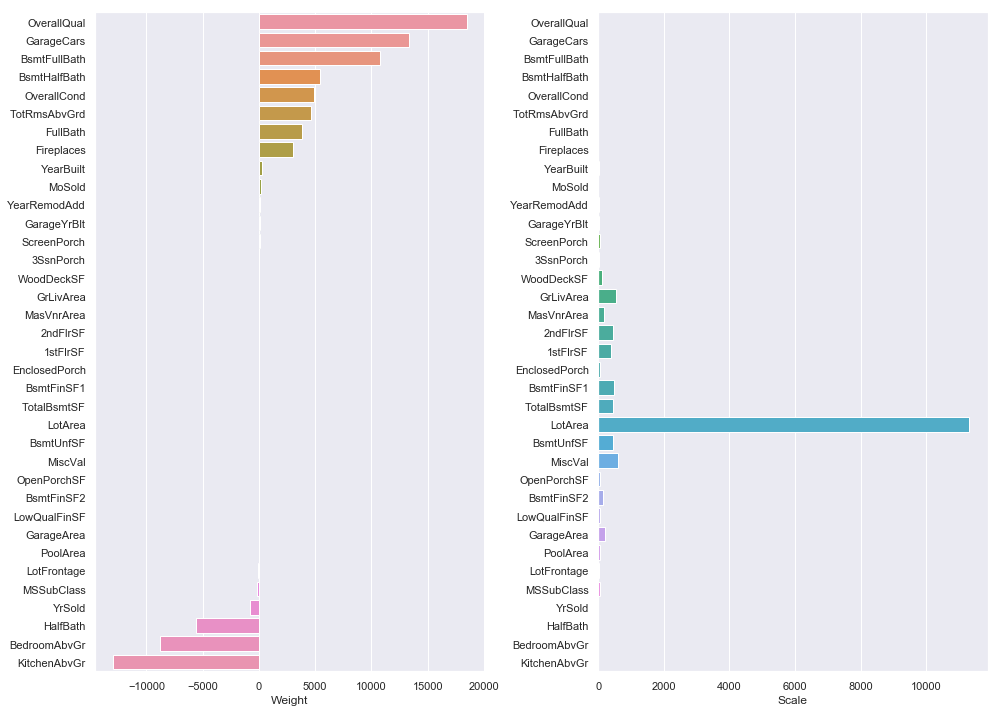

In [18]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

Будем масштабировать наши признаки перед обучением модели. <br>Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

Для этого воспользуемся трансформером StandardScaler. Трансформеры в sklearn имеют методы fit и transform (а еще fit_transform). <br>Метод fit принимает на вход обучающую выборку и считает по ней необходимые значения, transform применяет преобразование к переданной выборке.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 32085.3150
Train RMSE = 35631.2160


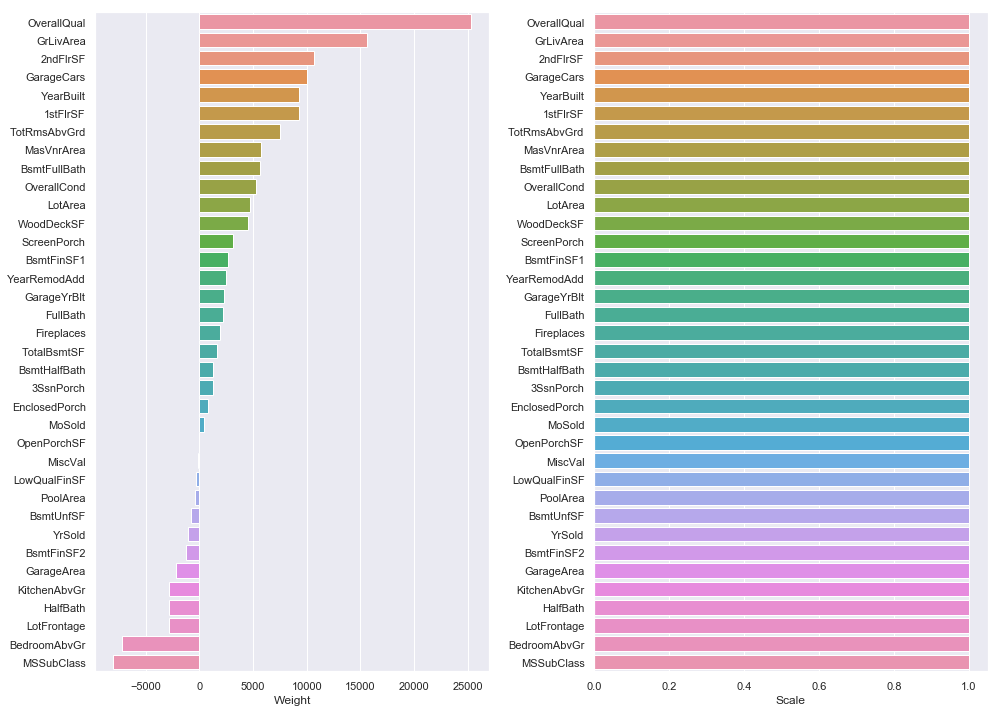

In [20]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. <br>У нашей модели это alpha — коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. <br>Посмотрим, как это можно сделать (заметьте, что мы перебираем alpha по логарифмической сетке, чтобы узнать оптимальный порядок величины):

In [21]:
import warnings

warnings.filterwarnings('ignore')

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

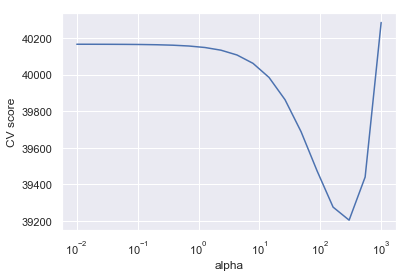

In [22]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся очень удобным классом Pipeline: <br>обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками <br>(например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод fit, а для тестовой — transform), <br>а затем обучить/применить модель (для обучающей fit, а для тестовой — predict). Pipeline позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую.

In [23]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 31703.3590


---------
---------
------

Сейчас мы явно вытягиваем из данных не всю информацию, что у нас есть, просто потому, что мы не используем часть категориальных признаков. Эти признаки в датасете закодированы строками.

<br>Давайте выделим такие признаки и сразу заполним пропуски в них специальным значением 
<br>(то, что у признака пропущено значение, само по себе может быть хорошим признаком):

In [38]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [39]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
376,RL,Pave,NotGiven,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
279,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1092,RL,Pave,NotGiven,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
830,RL,Pave,NotGiven,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
687,FV,Pave,NotGiven,IR2,Lvl,AllPub,FR2,Gtl,Somerst,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


Нам нужно как-то закодировать эти категориальные признаки числами, ведь линейная модель не может работать с такими абстракциями. 
<br>Два стандартных трансформера из sklearn для работы с категориальными признаками:
* LabelEncoder: перенумеровывает значения признака натуральными числами
* OneHotEncoder: ставит в соответствие каждому признаку целый вектор, состоящий из нулей и одной единицы <br>(которая стоит на месте, соответствующем принимаемому значению, таким образом кодируя его).
<br><br>
* Это всего лишь категориальные данные, и между числами на самом деле нет никакой связи. <br>Проблема здесь в том, что, поскольку разные числа в одном столбце, модель неправильно подумает, что данные находятся в каком-то особом порядке — 0 < 1 < 2 Хотя это, конечно, совсем не так.
* Имеет недостаток в добавлении большего количества столбцов в набор данных. <br>Это может привести к значительному увеличению количества столбцов, если у вас есть много уникальных значений в столбце категории.

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 26264.2262


*На практике мы часто игнорируем форму распределения и просто преобразуем данные для их центрирования, удаляя среднее значение каждого объекта, а затем масштабируем его, деля непостоянные объекты на их стандартное отклонение.*

*The function scale provides a quick and easy way to perform this operation on a single array-like dataset.*

Мы не производим скейлинг OneHot-кодированных признаков из-за *уже их единичной длины (так задали), я полагаю*.

Посмотрим на размеры матрицы после OneHot-кодирования:

In [27]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 294)


Как видим, количество признаков увеличилось более, чем в 3 раза. 
<br>Это может повысить риски переобучиться: соотношение количества объектов к количеству признаков значительно сократилось.

Попытаемся обучить линейную регрессию с $\ell_1$-регуляризатором. 
<br>$\ell_1$-регуляризатор разреживает признаковое пространство, иными словами, такая модель зануляет часть весов.

In [28]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % rmse(y_test, y_pred))

RMSE = 26468.4015


In [29]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 29


Подберем для нашей модели оптимальный коэффициент регуляризации:

Best alpha = 263.6651


Text(0, 0.5, 'CV score')

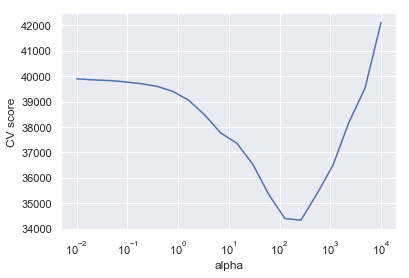

In [30]:
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [31]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 25642.6115


In [32]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 218


Иногда очень полезно посмотреть на распределение остатков. Нарисуем гистограмму распределения квадратичной ошибки на обучающих объектах:

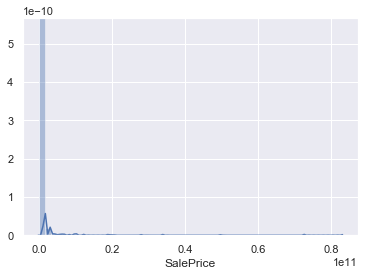

In [33]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. <br>Например, выбросим примеры, остаток у которых больше 0.95-квантили:

In [34]:
mask = (error < np.quantile(error, 0.95))

In [35]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 24963.5922


In [36]:
X_train = X_train[mask]
y_train = y_train[mask]

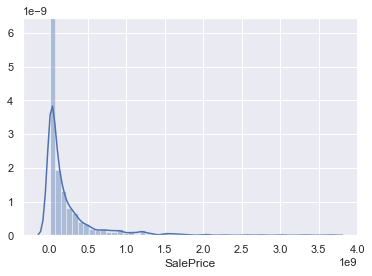

In [37]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

Видим, что качество модели заметно улучшилось! Также бывает очень полезно посмотреть на примеры с большими остатками и попытаться понять, почему же модель на них так сильно ошибается: это может дать понимание, как модель можно улучшить.